## TASK 1: Dataset Loading, Cleaning & Filling missing values

### Step 1: Loading the Dataset

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

vehicles = r"C:\Users\payal\Downloads\vehicles.csv"
df = pd.read_csv(vehicles, low_memory=False)
df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


### Step 2: Cleaning the Dataset

In [23]:
print(df.shape)

(40081, 83)


In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40081 entries, 0 to 40080
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        40081 non-null  float64
 1   barrelsA08       40081 non-null  float64
 2   charge120        40081 non-null  float64
 3   charge240        40081 non-null  float64
 4   city08           40081 non-null  int64  
 5   city08U          40081 non-null  float64
 6   cityA08          40081 non-null  int64  
 7   cityA08U         40081 non-null  float64
 8   cityCD           40081 non-null  float64
 9   cityE            40081 non-null  float64
 10  cityUF           40081 non-null  float64
 11  co2              40081 non-null  int64  
 12  co2A             40081 non-null  int64  
 13  co2TailpipeAGpm  40081 non-null  float64
 14  co2TailpipeGpm   40081 non-null  float64
 15  comb08           40081 non-null  int64  
 16  comb08U          40081 non-null  float64
 17  combA08     

In [44]:
# Check Column Names with Missing Values

df.columns[df.isnull().any()]

Index(['cylinders', 'displ', 'drive', 'eng_dscr', 'trany', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'c240bDscr', 'startStop'],
      dtype='object')

In [52]:
# Check for Duplicate Values

duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

# Result: No duplicate values found

# If any duplicate records are found, then use:
## df.drop_duplicates()

Duplicate Rows :


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb


In [55]:
# To eliminate all rows & columns having missing data use: 
## df.dropna()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb


In [3]:
# Drop columns which are not relevant for analysis or have more % of missing values

new_df = df.drop(columns=["eng_dscr", "guzzler", "trans_dscr", "tCharger", "sCharger", "atvType", "fuelType2", "rangeA", "evMotor", 
                 "mfrCode", "c240Dscr", "c240bDscr", "startStop"])
new_df

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,0.0,Two Seaters,1985,-2250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,0.0,Two Seaters,1985,-11500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,0.0,Subcompact Cars,1985,0,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,0.0,Vans,1985,-11500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,0.0,Compact Cars,1993,-5750,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40076,14.982273,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,0.0,Compact Cars,1993,-2000,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
40077,14.330870,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,0.0,Compact Cars,1993,-1500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
40078,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,0.0,Compact Cars,1993,-2250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
40079,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,0.0,Compact Cars,1993,-2250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0


### Step 3: Filling Missing Values

In [3]:
# Filling missing values with mean, median, mode

new_df["cylinders"] = new_df["cylinders"].fillna(new_df["cylinders"].mean())
new_df["displ"] = new_df["displ"].fillna(new_df["displ"].mean())
new_df["drive"] = new_df["drive"].fillna(new_df["drive"].mode()[0])
new_df["trany"] = new_df["trany"].fillna(new_df["trany"].mode()[0])

In [4]:
# Display cleaned dataset

print(new_df.shape)
new_df.info()

(40081, 70)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40081 entries, 0 to 40080
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        40081 non-null  float64
 1   barrelsA08       40081 non-null  float64
 2   charge120        40081 non-null  float64
 3   charge240        40081 non-null  float64
 4   city08           40081 non-null  int64  
 5   city08U          40081 non-null  float64
 6   cityA08          40081 non-null  int64  
 7   cityA08U         40081 non-null  float64
 8   cityCD           40081 non-null  float64
 9   cityE            40081 non-null  float64
 10  cityUF           40081 non-null  float64
 11  co2              40081 non-null  int64  
 12  co2A             40081 non-null  int64  
 13  co2TailpipeAGpm  40081 non-null  float64
 14  co2TailpipeGpm   40081 non-null  float64
 15  comb08           40081 non-null  int64  
 16  comb08U          40081 non-null  float64
 17  

## TASK 2: Create 15 charts for visualization & state your insights

### Chart 1: A bar chart of average fuel efficiency(comb08) by vehicle class(VClass)

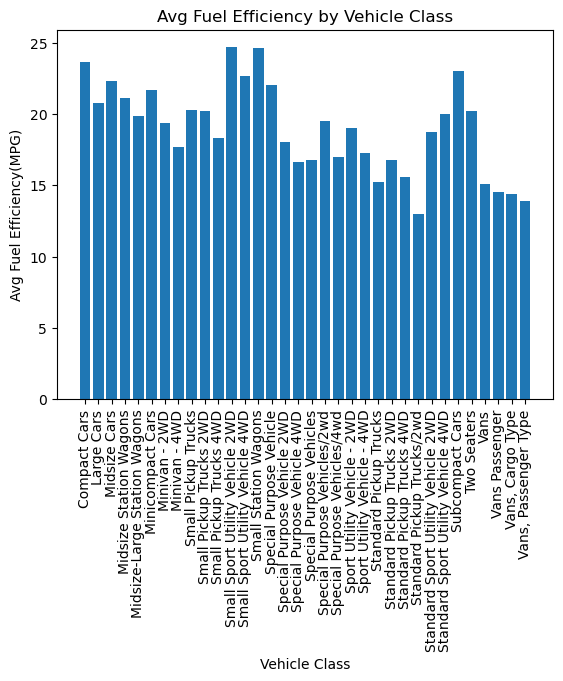

In [5]:
avg = new_df.groupby("VClass")["comb08"].mean()

plt.bar(avg.index, avg.values)
plt.xlabel("Vehicle Class")
plt.ylabel("Avg Fuel Efficiency(MPG)")
plt.title("Avg Fuel Efficiency by Vehicle Class")
plt.xticks(rotation=90)
plt.show()

Insight: This bar chart shows that smaller & lighter vehicles have higher fuel efficiency than larger & heavier vehicles.
Therefore, we can visualize that, vehicle size and weight are important factors affecting fuel economy.

### Chart 2: A histogram of fuel efficiency(comb08) distribution

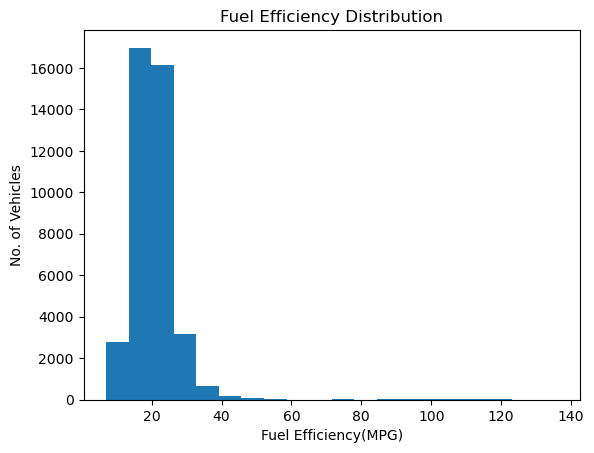

In [6]:
plt.hist(new_df["comb08"], bins=20)
plt.xlabel("Fuel Efficiency(MPG)")
plt.ylabel("No. of Vehicles")
plt.title("Fuel Efficiency Distribution")
plt.show()

Insight : This histogram shows that, most of the vehicles have low fuel efficiency i.e; less than 20 MPG, while few have high 
fuel efficiency i.e; more than 40 MPG.
Hence, we can conclude that fuel economy of the vehicles should be improved.

### Chart 3: A line plot of fuel efficiency(comb08) over time(year)

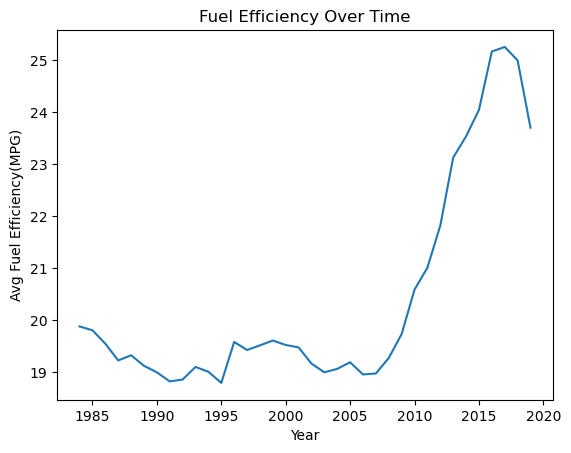

In [7]:
group = new_df.groupby("year")["comb08"].mean()

plt.plot(group.index, group.values)
plt.xlabel("Year")
plt.ylabel("Avg Fuel Efficiency(MPG)")
plt.title("Fuel Efficiency Over Time")
plt.show()

Insight : This line plot shows that there is an increase in the average fuel efficiency over time.
This indicates that there is growth in the fuel economy sector.

### Chart 4: A scatter plot of fuel efficiency(comb08) & engine displacement(displ)

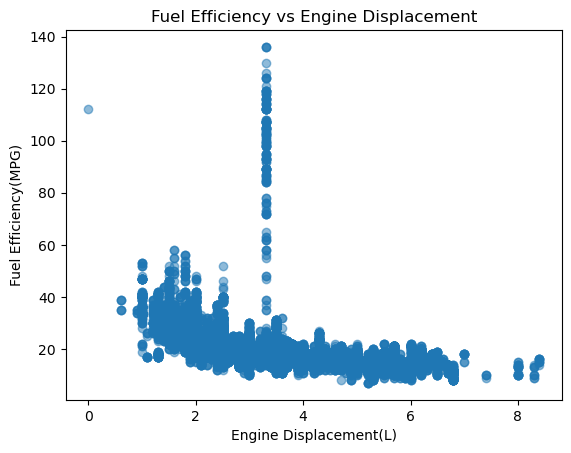

In [8]:
x = new_df["displ"]
y = new_df["comb08"]

plt.scatter(x, y, alpha=0.5)
plt.xlabel("Engine Displacement(L)")
plt.ylabel("Fuel Efficiency(MPG)")
plt.title("Fuel Efficiency vs Engine Displacement")
plt.show()

Insight : The scatter plot shows us that there is inverse relationship between fuel efficiency & engine displacement.
Hence, it's observed that they have negative correlation between them.

### Chart 5: An area plot of fuel efficiency(comb08) by no. of cylinders(cylinders)

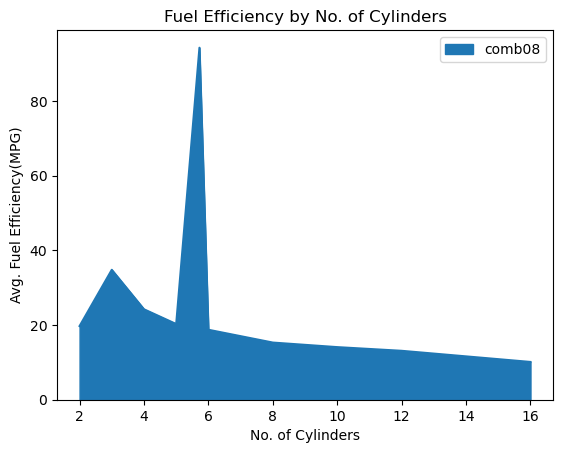

In [9]:
pivot_chart = new_df.pivot_table(index="cylinders", values="comb08", aggfunc="mean")

pivot_chart.plot.area()
plt.xlabel("No. of Cylinders")
plt.ylabel("Avg. Fuel Efficiency(MPG)")
plt.title("Fuel Efficiency by No. of Cylinders")
plt.show()

Insight : This area plot shows that the avg. fuel efficiency decreases as the no. of cylinders increases.
This means that more cylinders result in lower fuel economy.

### Chart 6: A stacked area plot of average fuel efficiency(comb08) by vehicle class(Vclass) over time(year)

<Figure size 1200x800 with 0 Axes>

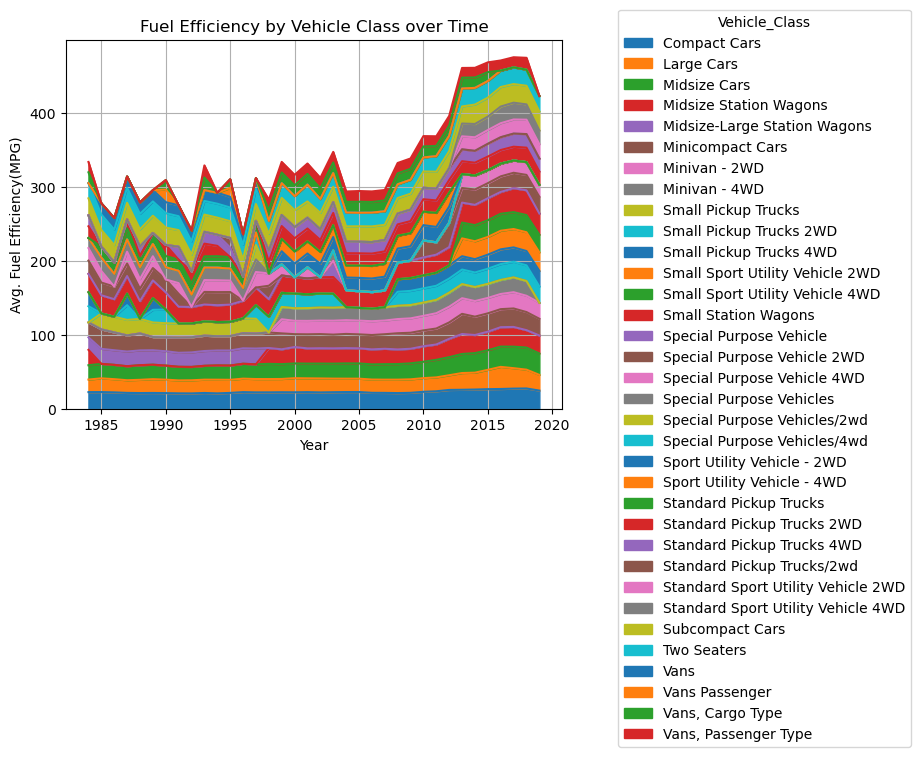

In [50]:
pivot_chart = new_df.pivot_table(index="year", columns="VClass", values="comb08", aggfunc="mean")
plt.figure(figsize=(12, 8))
pivot_chart.plot.area()
plt.xlabel("Year")
plt.ylabel("Avg. Fuel Efficiency(MPG)")
plt.title("Fuel Efficiency by Vehicle Class over Time")

plt.legend(title="Vehicle_Class", bbox_to_anchor=(1.1,1.1), loc="best")
plt.grid(True)
plt.show()

Insight : The stacked area plot shows that the smaller & lighter vehicles have increasing trends than larger & heavier vehicles.
This shows that the size and weight affect the fuel economy over time.

### Chart 7: A pie chart of fuel type(fuelType)

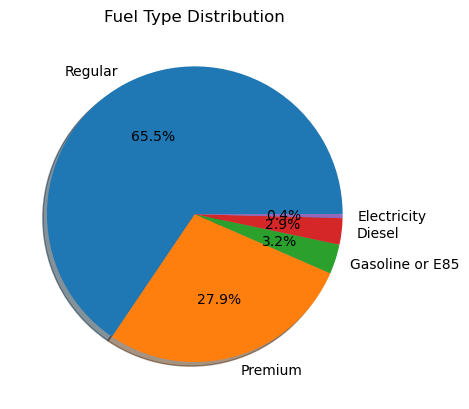

In [14]:
counts = new_df["fuelType"].value_counts().head(5)

plt.pie(counts, labels=counts.index, autopct="%1.1f%%", shadow=True)
plt.title("Fuel Type Distribution")
plt.show()

Insight : The pie chart shows that the most used fuel type is regular gasoline, followed by premium gasoline & diesel.
This indicates that most of the vehicles use conventional fuels.

### Chart 8: A bubble chart of annual fuel cost(fuelCost08) vs Greenhouse gas score(ghgScore) vs passenger volume(hpv)

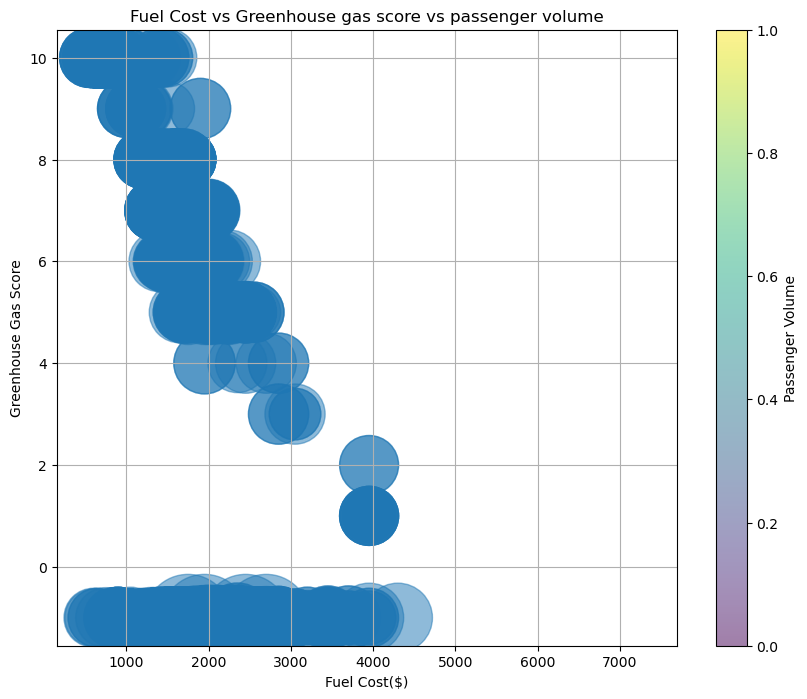

In [15]:
x= new_df["fuelCost08"]
y= new_df["ghgScore"]
size = new_df["hpv"]

plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=size*20, alpha=0.5)
plt.xlabel("Fuel Cost($)")
plt.ylabel("Greenhouse Gas Score")
plt.title("Fuel Cost vs Greenhouse gas score vs passenger volume")
plt.colorbar(label="Passenger Volume")
plt.grid(True)
plt.show()

Insight: The bubble chart displays negative correlation between fuel cost & greenhouse gas score.
This implies, as the fuel cost increases, the greenhouse gas score decreases, and vice-versa.

### Chart 9: A stacked bar plot for fuel type(fuelType), model(model) & year

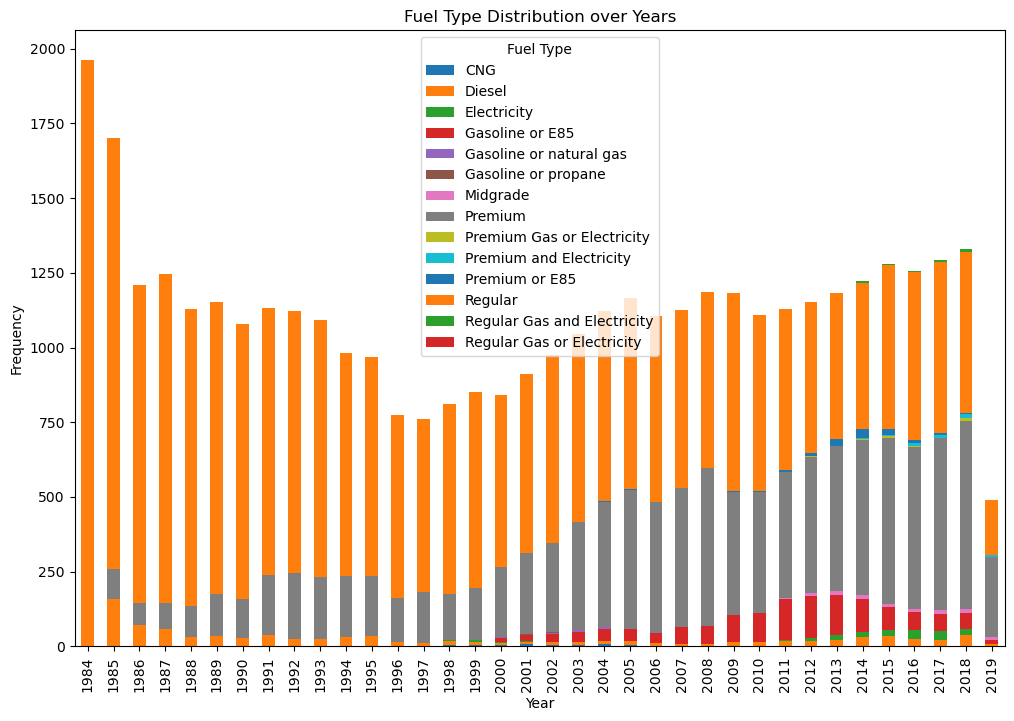

In [17]:
# Group the data and unstack it to prepare for the stacked bar chart
stacked_data = new_df.groupby(["year", "fuelType"])["model"].count().unstack().fillna(0)

# Create a stacked bar chart
stacked_data.plot(kind="bar", stacked=True, figsize=(12, 8))

# Customize the appearance
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Fuel Type Distribution over Years")

# Show the plot
plt.legend(title="Fuel Type")
plt.show()

Insight : The stacked bar plot shows that the most common gasoline used is "regular gasoline". 
For the year 1984, it's reported to have more usage of regular gasoline as compared to other years.
In the year 2019, the usage of gasoline has dropped.

### Chart 10: A sub plot of combined MPG of fueltype1 & fueltype2(comb08,combA08) & mpgData

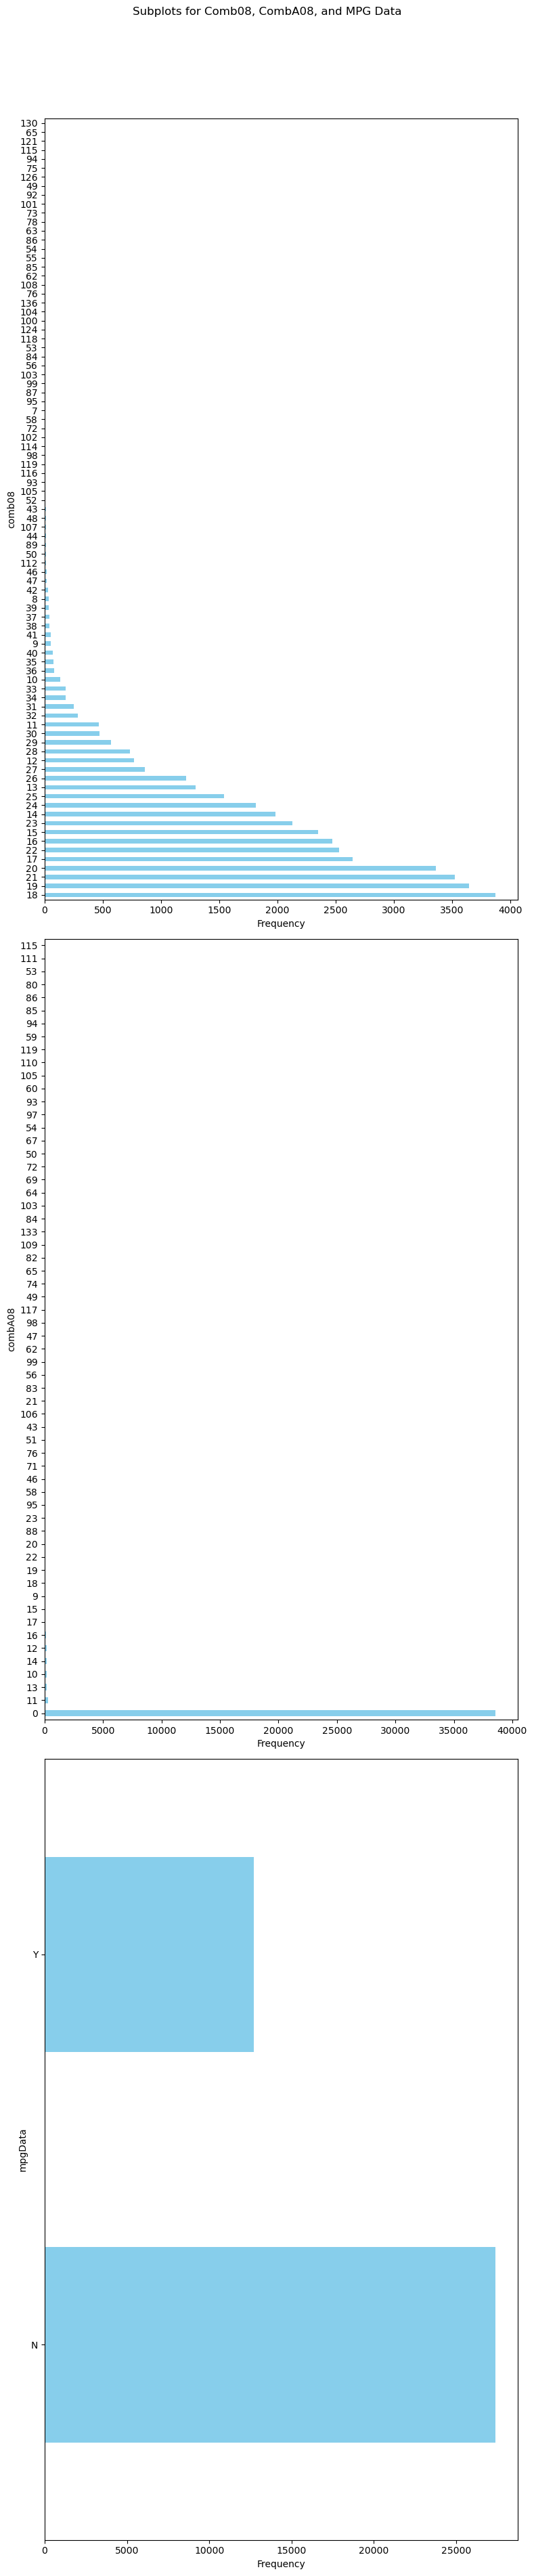

In [16]:
# Select the columns of interest from the DataFrame
data = new_df[["comb08", "combA08", "mpgData"]]

# Create subplots for each column
fig, axes = plt.subplots(len(data.columns), 1, figsize=(8, 40))
fig.suptitle("Subplots for Comb08, CombA08, and MPG Data")

# Iterate through the columns and create bar plots with swapped axes
for i, column in enumerate(data.columns):
    data[column].value_counts().plot(kind="barh", ax=axes[i], color="skyblue")
    axes[i].set_ylabel(column)
    axes[i].set_xlabel("Frequency")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Insight : The following subplots gives us the idea about the frequency of fuelType1, fuelType2, & mpgData.
We can state that 18 MPG is the average fuel MPG for fuelType1. And for fuelType2, we can see that it's rarely being used.
The combined fuel MPG i.e mpgData shows most vehicles have EPA estimated data, while only a small fraction have actual tested data.

### Chart 11: A horizontal bar graph of make & model

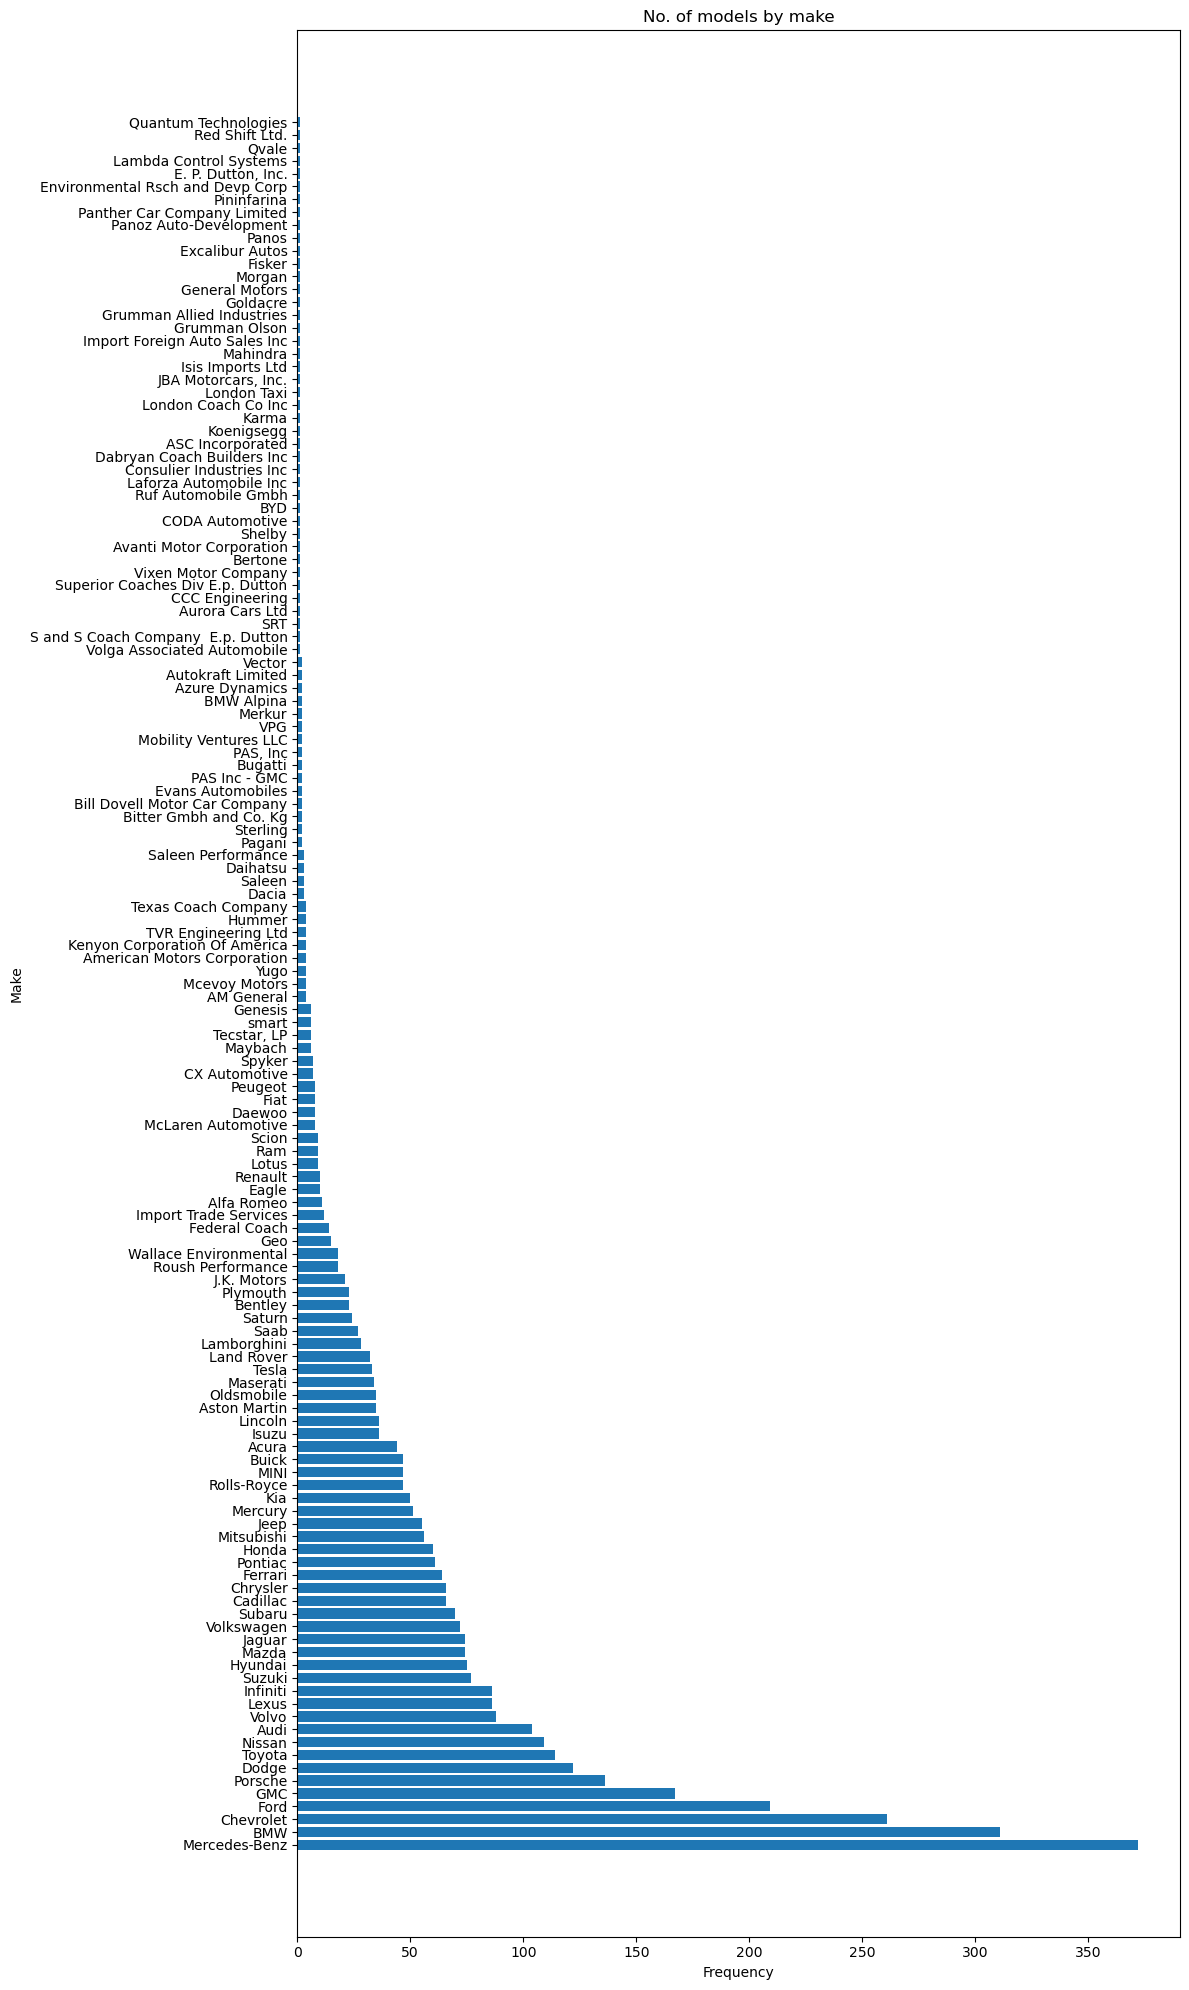

In [16]:
horz_data = new_df[["make", "model"]]

counts = horz_data.groupby("make")["model"].nunique()
counts = counts.sort_values(ascending=False)

plt.figure(figsize=(12, 20))
plt.barh(counts.index, counts.values)
plt.title("No. of models by make")
plt.xlabel("Frequency")
plt.ylabel("Make")

plt.tight_layout()
plt.show()

Insight : This horizontal bar graph shows that the manufacturing of Mercedes-Benz is higher as followed by BMW, Chevrolet & Ford.

### Chart 12: A line plot of co2 emissions over a year

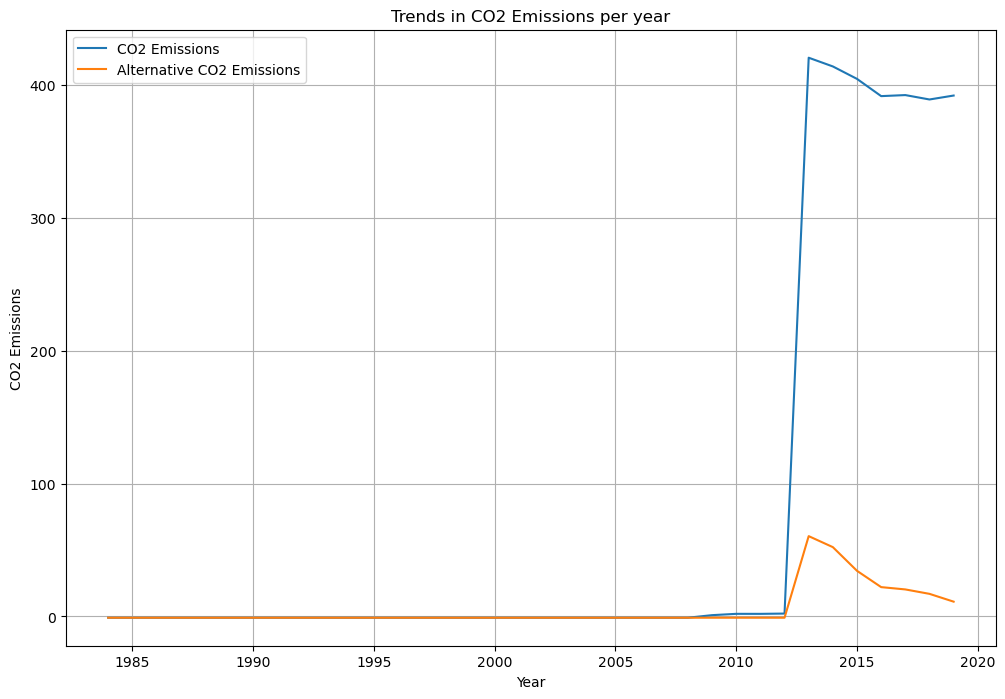

In [17]:
line_columns = ["year", "co2", "co2A"]

line_data = new_df[line_columns]

co2_mean = line_data.groupby("year")["co2", "co2A"].mean()

plt.figure(figsize=(12, 8))
plt.plot(co2_mean.index, co2_mean["co2"], label="CO2 Emissions")
plt.plot(co2_mean.index, co2_mean["co2A"], label="Alternative CO2 Emissions")

plt.title("Trends in CO2 Emissions per year")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions")

plt.legend()
plt.grid(True)
plt.show()

Insight : The line chart shows that the co2 emissions have taken a sudden jump in the year 2012.
This depicts that there might be a cause of global warming and other human activities which affected CO2.

### Chart 13: A 3D graph of city MPG(city08), Highway MPG(highway08),& Barrels per year(barrels08) 

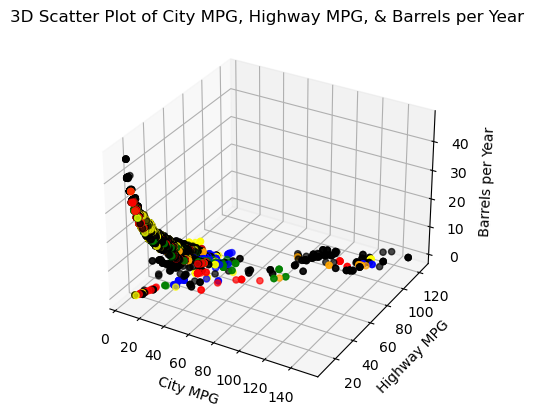

In [14]:
from mpl_toolkits.mplot3d import Axes3D

data = new_df[["city08", "highway08", "barrels08", "make"]]
fig = plt.figure(figsize=(4, 12))
ax = fig.add_subplot(111, projection='3d')

colors = {"Ford": "red", "Toyota": "green", "Honda": "blue", "Chevrolet": "yellow", "Nissan": "orange"}
ax.scatter(data["city08"], data["highway08"], data["barrels08"], marker='o', alpha=0.7, c=data["make"].apply(lambda x:colors.get(x,"black")))
ax.set_xlabel("City MPG")
ax.set_ylabel("Highway MPG")
ax.set_zlabel("Barrels per Year")
ax.set_title("3D Scatter Plot of City MPG, Highway MPG, & Barrels per Year")

#plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Insight : From this 3D plot, we can refer that there is a negative correlation between city MPG, highway MPG, & barrels/year.
The most common makes are "Ford", followed by "Toyota", "Honda", "Chevrolet", & "Nissan".

### Chart 14: A box plot of no. of cylinders(cylinders) vs displacement(displ)

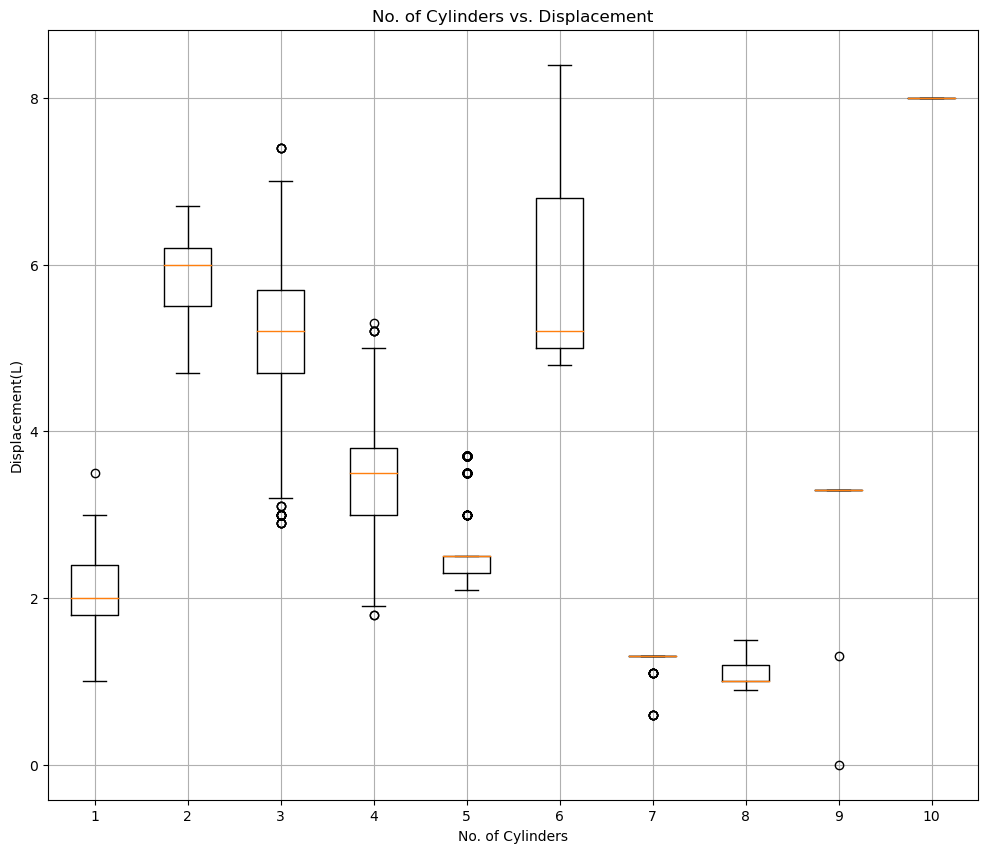

In [49]:
plt.figure(figsize=(12, 10))

plt.boxplot([new_df[new_df["cylinders"] == i]["displ"] for i in new_df["cylinders"].unique()]) 

plt.title("No. of Cylinders vs. Displacement")
plt.xlabel("No. of Cylinders")
plt.ylabel("Displacement(L)")

plt.grid(True)
plt.show()

Insight : The box plot shows us that the there is a positive correlation between cylinders & displacement.
This indicates that vehicles having more cylinders, tend to have larger engine displacement.

### Chart 15: A hexbin plot of fuel efficiency(comb08) vs engine displacement(displ)

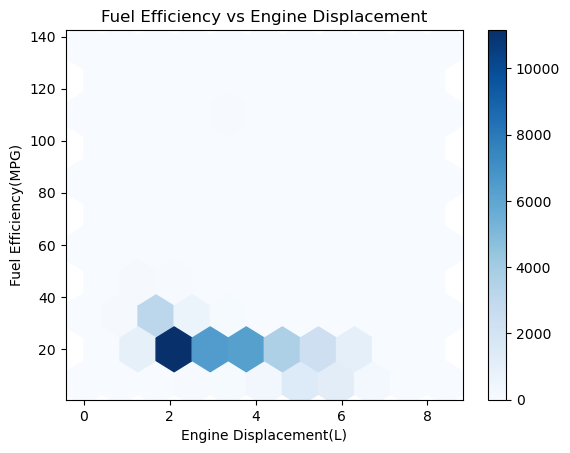

In [19]:
plt.hexbin(new_df["displ"],new_df["comb08"], gridsize=10, cmap="Blues")

plt.xlabel("Engine Displacement(L)")
plt.ylabel("Fuel Efficiency(MPG)")
plt.title("Fuel Efficiency vs Engine Displacement")
plt.colorbar()
plt.show()

Insight : The hexbin plot shows that the most dense region is at 2L of engine displacement & 25MPG of fuel efficiency.
This depicts that most of the vehicles have moderate engine size & fuel economy

## TASK 3: Correlation matrix of numerical features

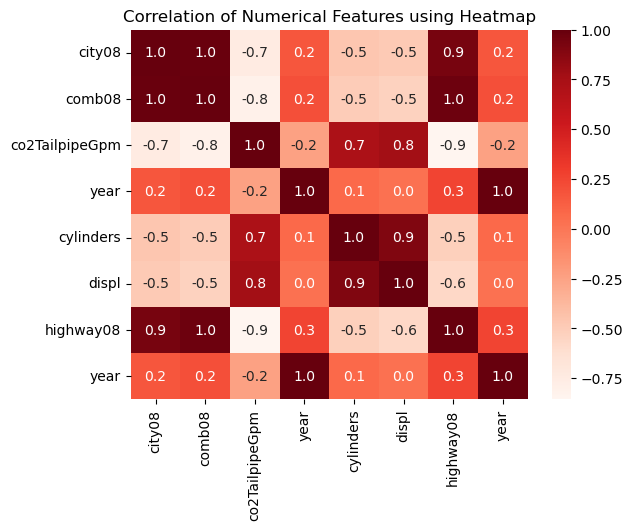

In [163]:
# Select numerical features from vehicles dataset
num_features = ["city08", "comb08", "co2TailpipeGpm", "year", "cylinders", "displ", "highway08", "year"]

# Create correlation matrix of numerical features
corr_matrix = new_df[num_features].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="Reds", fmt=".1f")
plt.title("Correlation of Numerical Features using Heatmap")
plt.show()

# Insights : 
- The heatmap shows the correlation matrix of numerical features. The correlation of the features is symmetric.
- Each feature is perfectly correlated with itself, hence the diagonal values are 1.
- A positive value means that the two features are positively correlated.
- A negative value means the two features are negatively correlated, hence they have inverse relation.
- A "zero" value means there is no correlation between the two features.

- The fuel efficienecy is inversely related to engine displacement, CO2 emissions, cylinders & fuel cost.
- The year feature is weakly positively correlated with the fuel efficiency.
- The year feature is weakly negatively correlated with the engine displacement, cylinders, CO2 emissions & fuel cost.

## TASK 4: Conclusion for Data analysis and visualization

- 1) We gained insights into the characteristics and performance of different vehicle models and how they affect the environment and economy. 
- 2) Data analysis and visualization helps consumers make informed decisions when choosing a vehicle model that suits their needs and preferences.
- 3) The fuel economy of the vehicles is influenced by several factors, such as vehicle class, engine size, number of cylinders, CO2 emissions and fuel cost.
- 4) Fuel efficiency is inversely related to engine size, as shown by the scatter plot of fuel efficiency vs engine displacement and the heatmap of correlation matrix.
- 5) There is some improvement in fuel economy over time, as shown by the weak positive correlation between year and fuel efficiency.
- 6) There is some reduction in engine size over time, as shown by the weak negative correlation between year and engine.
- 7) The most commonly used fuelType is regular gasoline, and is used by almost all models of vehicle class.
- 8) As the number of cylinders increases, the fuel efficiency decreases.
- 9) Vehicles with higher horsepower tend to have lower fuel efficiency.
- 10) The average fuel economy has improved over years, but there's still improvement left for different models & makes.